In [1]:
cd ../

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob

In [3]:
# specify path to the lightcurve
timesort_lc_path = "transiting_exoplanet/WASP-100_TESS_raw_data.csv"
phase_lc_path = "transiting_exoplanet/WASP-100_TESS_model_data.csv"

# object name (or abbreviation)
n = "WASP100"

# resample length for time-sorted LC purposes
resample_len = '1h'

# Time-Sorted Light Curve

In [4]:
lc = pd.read_csv(timesort_lc_path, delimiter=' ', names=['bjd', 'mag'], header=None)

In [8]:
lc['jd'] = lc['bjd'] + 2457000

In [9]:
lc['mjd'] = jd.jd_to_mjd(lc['jd'])

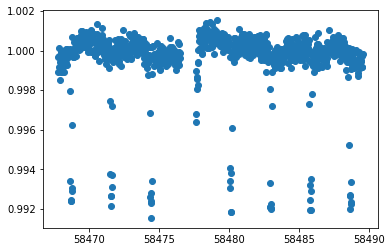

In [10]:
#raw data
plt.scatter(lc['mjd'], lc['mag'])

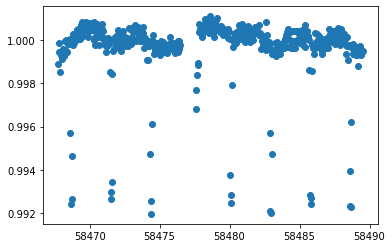

In [11]:
# #resampled data
time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)
plt.scatter(time_preproc_lc['Modified Julian Day'], time_preproc_lc['Magnitude'])

In [12]:
time_preproc_lc = time_preproc_lc[time_preproc_lc['Modified Julian Day'].between(58400, 58475.3)]

In [13]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 21.41176470588235 s


# Phased Light Curve

In [14]:
lc = pd.read_csv(phase_lc_path, delimiter=' ', names=['phase', 'mag'], header=None)

In [15]:
lc['phase'] = lc['phase'] + 0.5

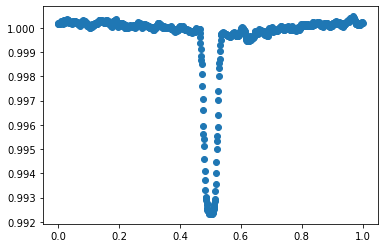

In [16]:
#raw data
plt.scatter(lc['phase'], lc['mag'])

In [17]:
len(lc)/4 #/ 8.5

250.0

In [18]:
len(np.arange(0,1.01,0.004))

253

In [19]:
phase_preproc_lc = LC_phasesort_preproc(lc, bins=np.arange(0,1.01,0.006))

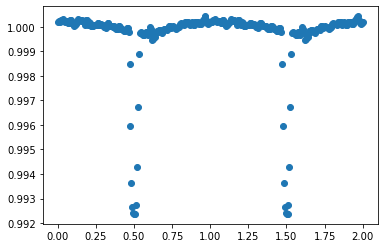

In [20]:
#preprocessed data
plt.scatter(phase_preproc_lc['Phase'], phase_preproc_lc['Magnitude'])

In [21]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(phase_preproc_lc) / 8.5), "s")

Estimated video time of 39.529411764705884 s
